#  Image Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## PART1: Basic image manipulation operations

In this lab we start working with two-dimensional signals, i.e. images. 

A handy Python module for image manipulation is called <a href="http://scikit-image.org/"><font style="TrueType">scikit-image</font></a>, let's import it and then we can use it to load and display some pictures.

In [2]:
from skimage import data, io

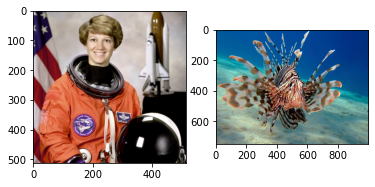

In [5]:
astro = data.astronaut() # scikit-image comes already with some images (try to use the <TAB> key on data.)
fish = io.imread('./images/lionfish.jpg') # or you can load a custom one (see the folder 'images')


plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(fish);

**Can you guess data type and shape of the images?**

In [6]:
print("image data type is: {}".format(type(astro)))
print("image shape is: {}".format(astro.shape))

image data type is: <class 'numpy.ndarray'>
image shape is: (512, 512, 3)


As expected, an `RGB` image is stored in memory as a three dimensional array (shape = **rows** $\mathbf{\times}$ **columns** $\mathbf{\times}$ **channels**). The intensities of each color channel are saved in a separate matrix.

Do you remember how to slice a `numpy.array`? Try to extract the three color channels from an image of choice and print their shape.

In [7]:
##Fill code here
R = astro[:, :, 0]
G = astro[:, :, 1]
B =  astro[:, :, 2]
print("R shape is: {}".format(R.shape))
print("G shape is: {}".format(G.shape))
print("B shape is: {}".format(B.shape))

R shape is: (512, 512)
G shape is: (512, 512)
B shape is: (512, 512)


**Let's try to inspect the content of a channel, for instance printing the first 5 elements of the first 3 lines of the <span style="color:red">red</span> one.**

In [8]:
##Code here
print(R[:3, :5])

[[154 109  63  54  76]
 [177 144 113 106 128]
 [201 182 168 159 167]]


It looks like an image is stored in memory as a matrix filled with integer numbers. Can you guess the right range? Check it out in the next box.

**Hint**: notice the use **`np.max`** and **`np.min`** on any input **`numpy.array`**.

In [9]:
print("Max value for the red channel: {}".format(np.max(R)))
print("Min value for the red channel: {}".format(np.min(R)))

Max value for the red channel: 255
Min value for the red channel: 0


Now, visualize the three channels of the astronaut image and try to visualize them in separate sections of the same figure. <span style="color:red">In which channel do you expect the astronaut suit will have highest values?</span>.

**Hint 1**: use <a href="http://matplotlib.org/api/colorbar_api.html">plt.colorbar</a> to see the color mapping.

**Hint 2**: stick to the same colormap used before

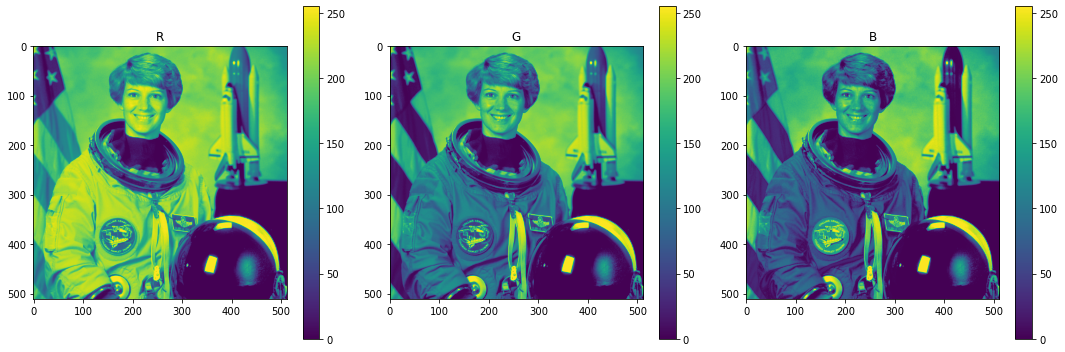

In [10]:
# Answer :
# I expect red channel to have higher values
# because astronaut has an orange suit and the american flag
# on the ack is red.

##Fill code here

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(R)
plt.title('R')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(G)
plt.title('G')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(B)
plt.title('B')
plt.colorbar()

plt.tight_layout() # a handy command that increases spacing between subplots

### <span style="color:red">R</span><span style="color:green">G</span><span style="color:blue">B</span> to grayscale conversion

So, a color image is a collection of three matrices each one representing a different color channel. How can we represent a grayscale image? How many *color channels* do we need? We know that it's possible to encode a color image in grayscale using the following linear transformation:

$Y = 0.2125 \cdot R + 0.7154 \cdot G + 0.0721 \cdot B$

*The coefficients represent the measured intensity perception of typical trichromat humans, depending on the primaries being used; in particular, human vision is most sensitive to green and least sensitive to blue.* [cit. <a href="https://en.wikipedia.org/wiki/Grayscale">Wikipedia</a>]

Write a `Python` function that converts the three channels of an input RGB image to float and then combines them in a grayscale encoding.

In [11]:
##Fill code here
def my_rgb2gray(img):
    return 0.02125*img[:,:,0] + 0.7154*img[:,:,1] + 0.0721*img[:,:,2]

Now test it on one of the images above (to obtain more pleasant results try to specify the option cmap='<span style="color:gray">gray</span>' for the function `plt.imshow`).

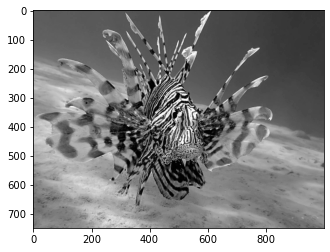

In [12]:
plt.imshow(my_rgb2gray(fish), cmap='gray');

We developed our grayscale conversion utility, but as you can imagine `skimage` can do that for us. Import the `color` module from the main library and check the help function for **<a href="http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray">color.rgb2gray</a>**.

### Histograms

An important alternative image representation is image histograms. Histograms represent the distribution of (intensity or color intensity) values in a signal (image). 
If dealing with RGB images you can compute 3 different histograms

You can choose a non standard binning if you want to obtain a coarser version of the histogram, and you can normalize them to treat them as probabilities.

**For more info**: check the documentation of  `plt.hist` (from `matplotlib`)

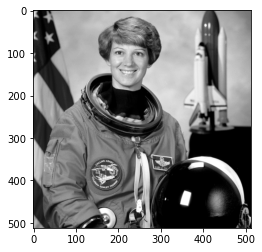

In [14]:
from skimage.color import rgb2gray
plt.imshow(rgb2gray(astro), cmap='gray')

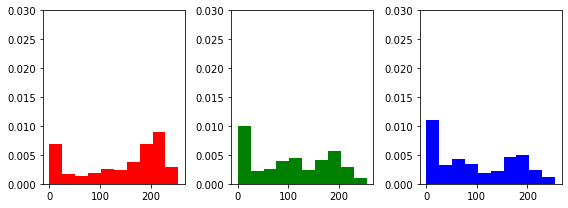

In [13]:
plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.hist(R.ravel(), density=True, color='r'); #density controls normalization (try out density False)
plt.ylim([0,0.03])


plt.subplot(1,3,2)
plt.hist(G.ravel(), density=True, color='g');
plt.ylim([0,0.03])

plt.subplot(1,3,3)
plt.ylim([0,0.03])
plt.hist(B.ravel(), density=True, color='b');

plt.tight_layout() # a handy command that increases spacing between subplots

**From those histograms it looks like the <span style="color:blue">blue channel</span> can be used to discriminate the foreground (a lionfish) from the background. This is gonna be the goal of the next section.**

### Histograms and image thresholding  

A <i>binary mask</i> is a simple but effective way to perform a fast background suppression. You can obtain a binary mask in several ways, let's see an example. Create $A$: a simple $3\times 3$ matrix and then print a binary mask corresponding to the positions where its values are bigger than a certain threshold.

In [15]:
A = np.array([[2,2,2], [2,3,2], [2,4,2]])
print(A)
print(A>2)

[[2 2 2]
 [2 3 2]
 [2 4 2]]
[[False False False]
 [False  True False]
 [False  True False]]


Easy, right? Now you can perform a simple background suppression identifying two thresholds from the histogram above and then representing the binary mask of the values lying in between them.

**Hint**: to combine the effect of two thresholds check the documentation for `np.multiply`.

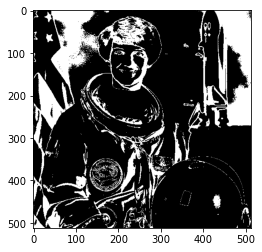

In [49]:
##Fill code here
mask = mask = np.multiply(R > 125, R < 190)
plt.imshow(mask, cmap='gray');

## PART2 Histogram contrast enhancement
<a href="https://en.wikipedia.org/wiki/Image_histogram">Histograms</a>  are   handy when trying to represent the content of an image in terms of intensity values. As we already said, while greyscale images can be described using a single histogram.

The overall <a href="https://en.wikipedia.org/wiki/Contrast_%28vision%29">contrast</a> is a major property of images that can be edited by means of operations on histograms.  

### Histograms and cumulative distributions

We provide  a simple function that, given an input image, plots the image, its histogram and its <a href="https://en.wikipedia.org/wiki/Histogram#Cumulative_histogram">cumulative histogram</a>. 
The function is ready for you to use it, but you should read the code to be sure you understand what it does.

In order to do that, check the functions <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist"><font style="TrueType">plt.hist</font></a> (from `matplotlib`) and <a href="http://scikit-image.org/docs/dev/api/skimage.exposure.html#cumulative-distribution"><font style="TrueType">exposure.cumulative_distribution</font></a> (from `skimage`).

In [50]:
from matplotlib import cm
from skimage import draw as drw
from skimage import data, color, exposure, img_as_float, img_as_ubyte

In [51]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    img = img_as_float(img) ##Convert our input greyscale image to float 
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
   
    return ax_img, ax_hist, ax_cdf



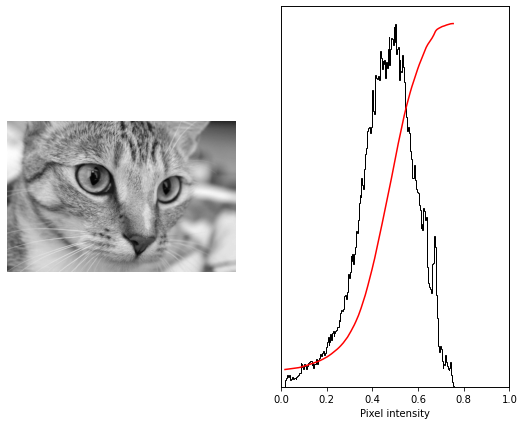

In [53]:
# Test the function plot_img_and_hist using a sample image
img = data.chelsea()
img = color.rgb2gray(img)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(9)
bin = 200 # change values
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes, bin) 

**Is the code of the cell above clear to you? If so, let's move on.**

### Contrast stretching and histogram equalization

A first goal here is to understand the task of constrast stretching in depth. To this purpose, we first implement a simple version, and then carry out an in depth exploration of different alternatives on functions from `skimage`. 
More infos on <b> <a href="http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm">Contrast stretching</a></b>

1) Implement your version of a linear contrast stretch of a uint8 image to the range [0,255] <br>
<b>Hint:</b> shift the histogram to the left so that its minimum value is equal to 0, then normalize in the range [0,1], finally multiply by 255. Careful with the data types (the output image should be an uint8)

2) Apply the function already implemented : see <a href="http://scikit-image.org/docs/dev/api/skimage.exposure.html#rescale-intensity"><font style="TrueType">exposure.rescale_intensity</font></a> and <a href="http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html"><font style="TrueType">np.percentile</font></a> to get some hints. Feel free to play with the stretching range.

We now explore a very different way to carry out image enhancement: the so called
<b><a href="https://en.wikipedia.org/wiki/Histogram_equalization">Histogram Equalization</a></b>:

3) Here we just adopt the skimage function: see <a href="http://scikit-image.org/docs/dev/api/skimage.exposure.html#equalize-hist"><font style="TrueType">exposure.equalize_hist</font></a>.

Finally you should compare all the results you obtain (try out different images) using the function `plot_img_and_hist`.

In [54]:
##Fill code here
def my_contrast_stretch(img):
    m=np.min(img)
    M=np.max(img)
    newImg = np.multiply(img-m, 255/(M-m))
    newImg = newImg.astype(np.uint8)
    return newImg 
   # follow the hints above, remember element-wise operations np.divide np.multiply

Below test and analyse the results of your implementation on different images

Max intensity: 0.7556109803921569
Min intensity: 0.01512078431372549
Max intensity: 254
Min intensity: 0
Datatype: float64
Datatype: uint8


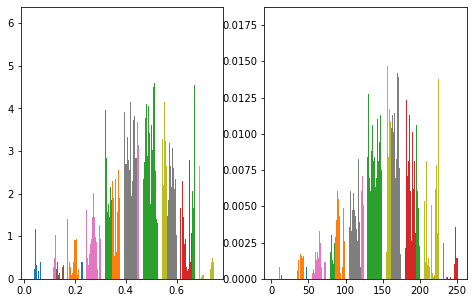

In [76]:
# Load an example image
#rgb_img = io.imread('images/kitten.jpg')
# or pick one from skimage (as above)
rgb_img = data.chelsea() 
#rgb_img = data.text() 
#rgb_img = data.logo() 

#TEST my_contrast_stretch
img = color.rgb2gray(rgb_img)
my_img_rescale = my_contrast_stretch(img);

print("Max intensity: {}".format(np.max(img)))
print("Min intensity: {}".format(np.min(img)))

print("Max intensity: {}".format(np.max(my_img_rescale)))
print("Min intensity: {}".format(np.min(my_img_rescale)))

print('Datatype:', img.dtype)
print('Datatype:', my_img_rescale.dtype)

fig = plt.figure(figsize=(8, 5))
ax1=plt.subplot(1,2,1)
# ... plot img histogram
plt.hist(img, density=True);
plt.subplot(1,2,2)
# .... plot my_img_rescale histogram
plt.hist(my_img_rescale, density=True);

Below we compare your implementation with skimage function and with histogram equalization 

C:\Users\ANDRES~1.COR\AppData\Local\Temp/ipykernel_18056/3685577008.py:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)


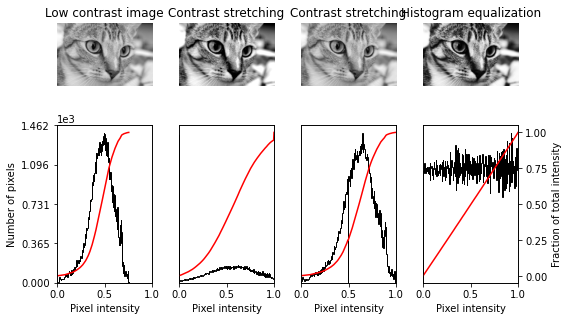

In [77]:
# Contrast stretching
# see exposure.rescale_intensity

# exposure.rescale_intensity allows you to choose a narrower range of your input histogram
# to choose a good one you may use the np.percentile function
min = np.percentile(img, 5)
max = np.percentile(img, 95)
img_rescale = exposure.rescale_intensity(img, in_range=(min, max))

# Equalization
img_eq = exposure.equalize_hist(img)# see exposure.equalize_hist 

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(my_img_rescale, axes[:, 2])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 3])
ax_img.set_title('Histogram equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## PART3 Geometrical Transformations


Here we also resort to a combination of implementation and demonstration of skimages to undestand geometrical transformations in depth. 

You should first implement two functions to apply a translation or a rotation to an input gray level image. 

Then, you may then compare the results you obtain with the ones provided by the skimage functions 

<a href="https://scikit-image.org/docs/dev/auto_examples/transform/plot_geometric.html#sphx-glr-auto-examples-transform-plot-geometric-py" > SKIMAGE demo here </a>


In [80]:
def translate(image, t):
    width,height=image.shape[:2]   
    dst = np.zeros((width, height, 3), dtype=np.uint8)
    # INVERSE MAPPING Loop over the destination, not the source, to ensure that you cover
    # every destination pixel exactly 1 time.
    for u in range(width):
        for v in range(height):
            #... apply translation 
            x =  u + t[0]
            y =  v + t[1]
            intx, inty = int(x), int(y)
            # here we truncate the floating point values
            # optionally try out the bilinear interpolation
            if 0 < x < width and 0 < y < height:
                dst[u, v] = image[intx, inty]  
    return dst

C:\Users\ANDRES~1.COR\AppData\Local\Temp/ipykernel_18056/2448038412.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = color.rgb2gray(rgb_img)


[13, 20]


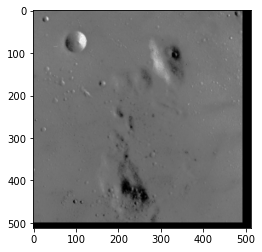

In [86]:
#TEST TRANSLATION
rgb_img = data.moon()  
img = color.rgb2gray(rgb_img)
t=[13,20] ### TRY OTHERS
print(t)
I_t=translate(img,t)
plt.imshow(I_t,cmap=plt.cm.gray)

In [87]:
def rotation(image, angle):
    #... FILL IN taking inspiration from the function translate
    width,height = image.shape[:2:]
    dst = np.zeros((width, height, 3), dtype=np.uint8)
    
    #center of rotation
    center = (width/2, height/2)
  
    for u in range(width):
        for v in range(height):
            x = (u-center[0])*np.cos(angle)-(v-center[1])*np.sin(angle)+center[0]
            y = (u-center[0])*np.sin(angle)+(v-center[1])*np.cos(angle)+center[1]
            intx, inty = int(x), int(y)
            if 0 < x < width and 0 < y < height:
                dst[u, v] = image[intx, inty]  
    return dst

C:\Users\ANDRES~1.COR\AppData\Local\Temp/ipykernel_18056/237745429.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = color.rgb2gray(rgb_img)


0.1


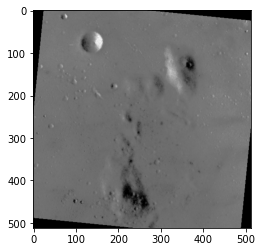

In [88]:
#TEST ROTATION
rgb_img = data.moon()  
img = color.rgb2gray(rgb_img)
angle=0.1 ### TRY OTHERS
print(angle)
I_rot=rotation(img,angle)
plt.imshow(I_rot,cmap=plt.cm.gray)

## PART4 Optional parts
-  <a href="https://en.wikipedia.org/wiki/Adaptive_histogram_equalization"><b>Adaptive equalization</b></a>: try out <a href="http://scikit-image.org/docs/dev/api/skimage.exposure.html#equalize-adapthist"><font style="TrueType">exposure.equalize_adapthist</font></a>. Try to use different tiles and clip limit.
- Other geometric (similarity) transformations: implement scaling and/or rotation around the center of the image 


In [97]:
def adaptive(img, clip_limit):
    return exposure.equalize_adapthist(img, clip_limit=my_limit)




C:\Users\ANDRES~1.COR\AppData\Local\Temp/ipykernel_18056/2083627758.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grass = color.rgb2gray(data.grass())


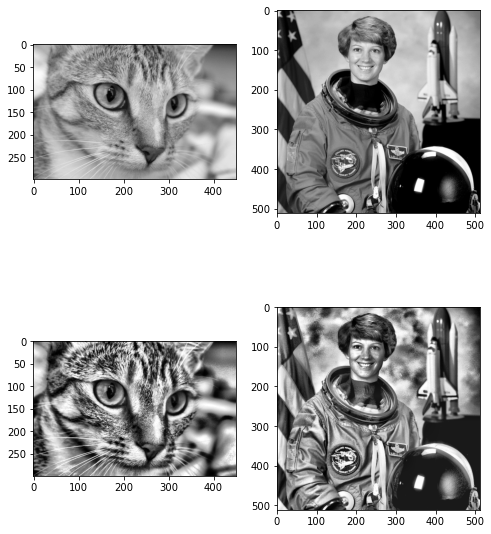

In [102]:
grass = color.rgb2gray(data.grass())
cat = color.rgb2gray(data.cat())
astr = color.rgb2gray(data.astronaut())
#test
fig=plt.figure(figsize=(8,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax1.imshow(cat, cmap=plt.cm.gray)
ax2.imshow(astr, cmap=plt.cm.gray)
ax3.imshow(adaptive(cat,0.05), cmap=plt.cm.gray)
ax4.imshow(adaptive(astr ,0.05), cmap=plt.cm.gray)

In [104]:
def rotation_center(image, angle, center):
    #... FILL IN taking inspiration from the function translate
    width,height = image.shape[:2:]
    dst = np.zeros((width, height, 3), dtype=np.uint8)
    for u in range(width):
        for v in range(height):
            x = (u-center[0])*np.cos(angle)-(v-center[1])*np.sin(angle)+center[0]
            y = (u-center[0])*np.sin(angle)+(v-center[1])*np.cos(angle)+center[1]
            intx, inty = int(x), int(y)
            if 0 < x < width and 0 < y < height:
                dst[u, v] = image[intx, inty]  
    return dst

C:\Users\ANDRES~1.COR\AppData\Local\Temp/ipykernel_18056/4250804695.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = color.rgb2gray(rgb_img)


0.1


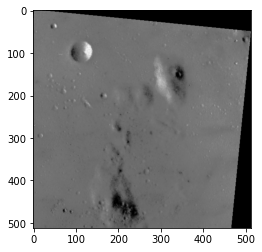

In [105]:
#TEST ROTATION
rgb_img = data.moon()  
img = color.rgb2gray(rgb_img)
angle=0.1 ### TRY OTHERS
print(angle)
I_rot=rotation_center(img,angle, [20,20])
plt.imshow(I_rot,cmap=plt.cm.gray)